In [ ]:
# Source of the data
# https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U

In [ ]:
# Importing required libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the data
train = pd.read_csv('/content/drive/MyDrive/Datasets/Input/train_tweet.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/Input/test_tweets.csv')

In [ ]:
# Data Dimension
print(f'The training data has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'The testing data has {test.shape[0]} rows and {test.shape[1]} columns.')

The training data has 31962 rows and 3 columns.
The testing data has 17197 rows and 2 columns.


In [ ]:
# sample data from training
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# sample data from testing
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
# traing data null value check
train.isnull().sum()

,0
id,0
label,0
tweet,0


In [ ]:
# data sample for label 0
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# data sample for label 1
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


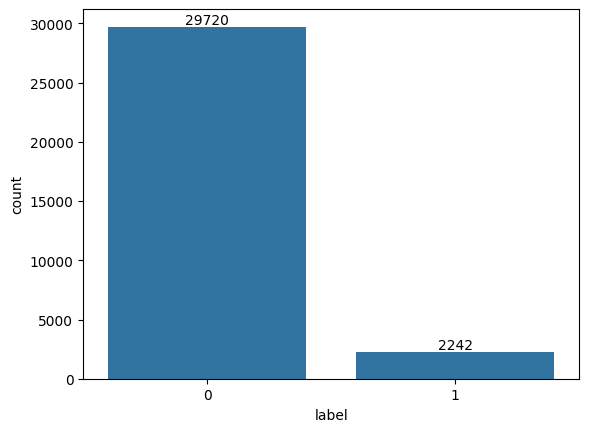

In [ ]:
# ploting the data for distribution
ax = sns.countplot(data=train, x='label')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# addding new column to capture the length
train['length'] = train['tweet'].str.len()
train.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [ ]:
# stats
train.groupby('label')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,29720.0,84.328634,29.566484,11.0,62.0,88.0,107.0,274.0
1,2242.0,90.187779,27.375502,12.0,69.0,96.0,111.0,152.0


In [ ]:
# 30 most frequently repeated words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

word_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x:x[1], reverse=True)

frequency = pd.DataFrame(word_freq, columns=['word', 'frequency'])
frequency.head()

,word,frequency
0,user,17577
1,love,2749
2,day,2311
3,amp,1776
4,happy,1686


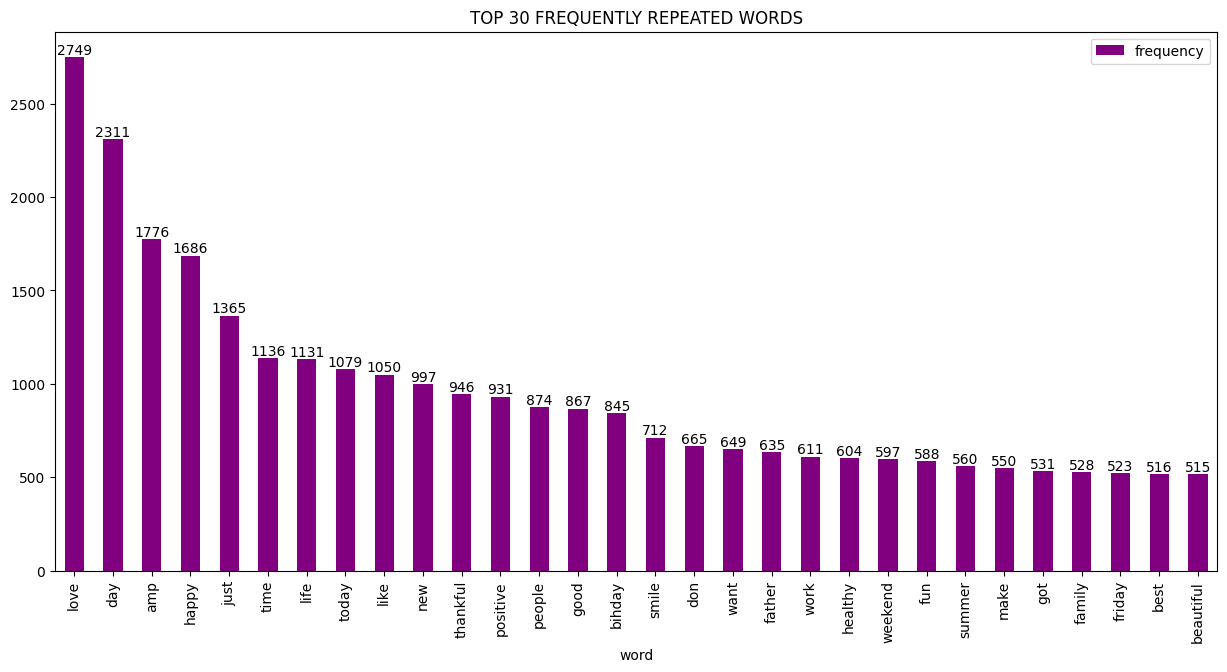

In [ ]:
# Plotting the word frequency by excluding "user" because its PII data
freq_plot = frequency.loc[1:30].plot(x='word', y='frequency', kind='bar', figsize=(15,7),color='purple')
freq_plot.bar_label(freq_plot.containers[0])
plt.title('TOP 30 FREQUENTLY REPEATED WORDS')
plt.show()

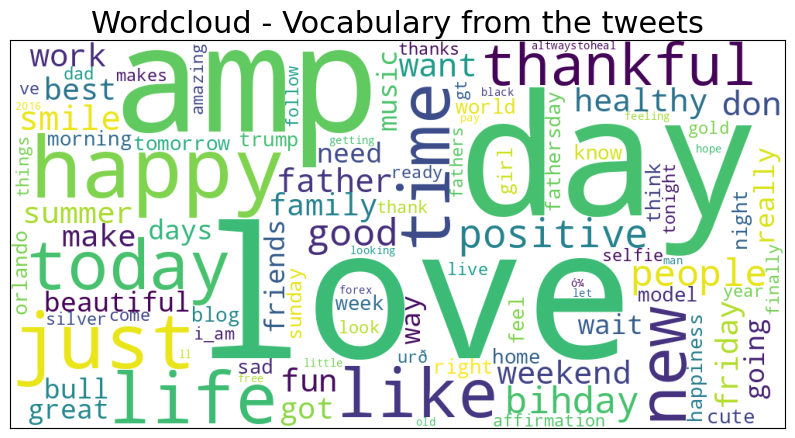

In [ ]:
# word cloud by excluding "user" as its PII

from wordcloud import WordCloud

wc_plot = WordCloud(background_color='white', width=1000, height=500).generate_from_frequencies(dict(word_freq[1:100]))

plt.figure(figsize=(10,8))
plt.imshow(wc_plot)
plt.title('Wordcloud - Vocabulary from the tweets', fontsize=22)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Removing the word "@user" from the raw data
train['c_tweets'] = train['tweet'].str.replace(r'@user\b', '', regex=True).str.strip()

# data sample
train.head()

,id,label,tweet,c_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


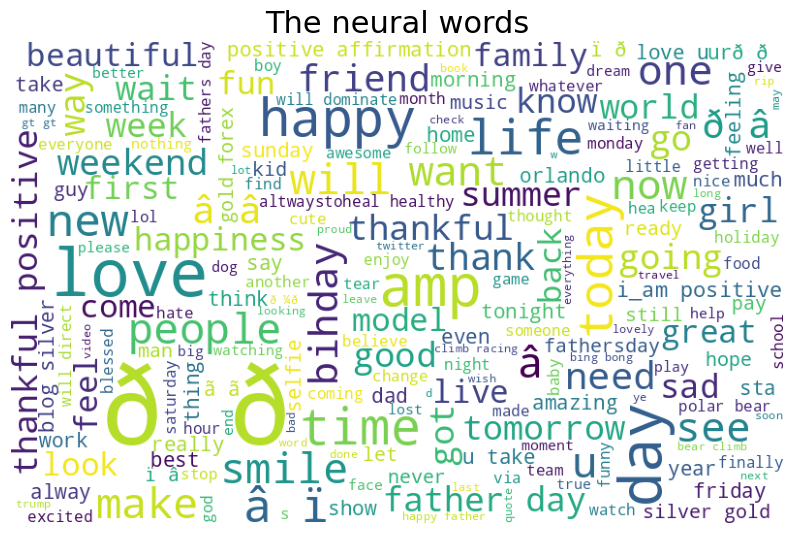

In [ ]:
normal_words = ' '.join([text for text in train['c_tweets'][train['label']==0]])

nwc_plot = WordCloud(background_color='white', width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,8))
plt.imshow(nwc_plot)
plt.title('The neural words', fontsize=22)
plt.axis('off')
plt.show()

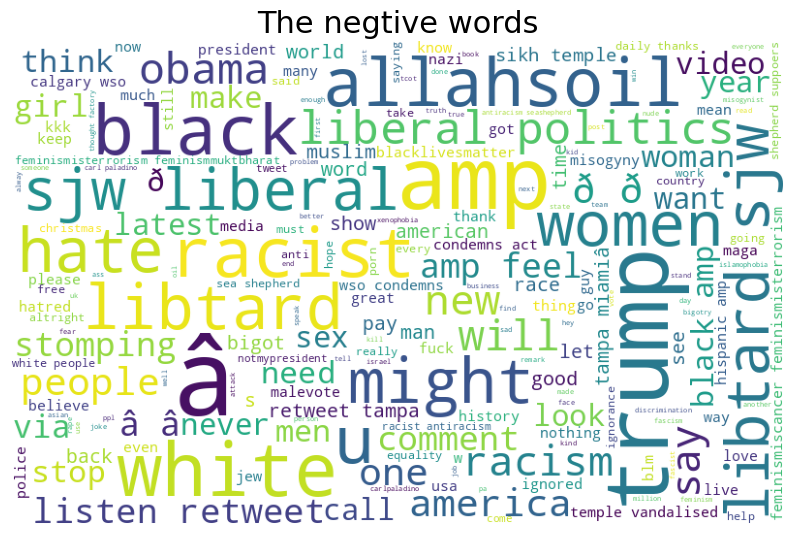

In [ ]:
negative_words = ' '.join([text for text in train['c_tweets'][train['label']==1]])

ntwc_plot = WordCloud(background_color='white', width=800, height=500, random_state=0, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,8))
plt.imshow(ntwc_plot)
plt.title('The negtive words', fontsize=22)
plt.axis('off')
plt.show()

In [ ]:
# function to extract hashtags

def hashtag_extract(x):
    hashtags = []
    import re     # local call

    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting the hastag from the neutral tweets
ht_regular = hashtag_extract(train['c_tweets'][train['label']==0])

# extracting the hastag from the neutral tweets
ht_negative = hashtag_extract(train['c_tweets'][train['label']==1])

# unnesting the list
ht_regular = sum(ht_regular, [])
ht_negative = sum(ht_negative, [])

In [ ]:
# Homework

# try to create count plot for top 30 hashtag in positive and negative tweets seperately